In [14]:
import pandas as pd

df = pd.read_csv("../data/real_final.csv")

In [15]:
print(df.isnull().sum())

GameDate              0
home_Team             0
away_Team             0
Result                0
home_Recent_5_Win     0
home_Recent_5_Loss    0
home_OPS              0
home_BB               0
home_HBP              0
home_SO               0
home_ERA              0
home_BB_p             0
home_K                0
home_IR               0
home_IS               0
home_TBF              0
away_OPS              0
away_BB               0
away_HBP              0
away_SO               0
away_ERA              0
away_BB_p             0
away_K                0
away_IR               0
away_IS               0
away_TBF              0
dtype: int64


Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏúºÎØÄÎ°ú Î∞îÎ°ú ÏßÑÌñâ

In [16]:
# featureÏôÄ label ÎÇòÎàÑÍ∏∞
df = df.drop(columns=['GameDate'])
X = df.drop(columns=['Result']) 
y = df['Result']

In [17]:
# Ïõê-Ìï´ Ïù∏ÏΩîÎî© (prefixÎ°ú home/away Íµ¨Î∂Ñ!)
team_encoded = pd.get_dummies(
    X[['home_Team', 'away_Team']].reset_index(drop=True),
    columns=['home_Team', 'away_Team'],
    prefix=['home_Team', 'away_Team']
).astype(int)

X_numeric = X.drop(columns=['home_Team', 'away_Team']).reset_index(drop=True)
X_scaled = pd.concat([X_numeric, team_encoded], axis=1)

In [18]:
from sklearn.model_selection import train_test_split

# 80% ÌïôÏäµ, 20% ÌÖåÏä§Ìä∏Î°ú Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=3
)

In [8]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 435.7 kB/s eta 0:05:45
   ---------------------------------------- 0.2/150.0 MB 2.0 MB/s eta 0:01:17
   ---------------------------------------- 0.4/150.0 MB 2.8 MB/s eta 0:00:53
   ---------------------------------------- 0.5/150.0 MB 2.5 MB/s eta 0:01:00
   ---------------------------------------- 0.6/150.0 MB 2.6 MB/s eta 0:00:59
   ---------------------------------------- 0.6/150.0 MB 2.6 MB/s eta 0:00:59
   ---------------------------------------- 0.6/150.0 MB 2.6 MB/s eta 0:00:59
   ---------------------------------------- 0.9/150.0 MB 2.5 MB/s eta 0:01:00
   ---------------------------------------- 1.0/150.0 MB 2.5 MB/s eta 0:00:59
   ---------------------------------------- 1.0/150.0 MB 2.5 MB/s eta 0:00:59
   ---------------------------------------- 1.2/150.0 MB 2.4 MB/s eta 0:01:0

In [24]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

keys = list(param_grid.keys())
param_combinations = list(itertools.product(*[param_grid[k] for k in keys]))

best_score = 0
best_model = None
best_params = None

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix


for i, combo in enumerate(param_combinations):
    params = dict(zip(keys, combo))
    
    model = XGBClassifier(
        **params,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=3
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"[{i+1}/{len(param_combinations)}] ACC={acc:.4f} | {params}")
    
    if acc > best_score:
        best_score = acc
        best_model = model
        best_params = params

print("\n‚úÖ Best Accuracy:", best_score)
print("‚úÖ Best Parameters:", best_params)

c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[1/32] ACC=0.8656 | {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8}
[2/32] ACC=0.8639 | {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[3/32] ACC=0.8639 | {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 0.8}
[4/32] ACC=0.8639 | {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[5/32] ACC=0.8689 | {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8}
[6/32] ACC=0.8656 | {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[7/32] ACC=0.8639 | {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 0.8}
[8/32] ACC=0.8656 | {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[9/32] ACC=0.8623 | {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8}
[10/32] ACC=0.8672 | {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[11/32] ACC=0.8639 | {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 0.8}
[12/32] ACC=0.8689 | {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[13/32] ACC=0.8672 | {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8}
[14/32] ACC=0.8541 | {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[15/32] ACC=0.8656 | {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 0.8}
[16/32] ACC=0.8623 | {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[17/32] ACC=0.8672 | {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[18/32] ACC=0.8672 | {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[19/32] ACC=0.8689 | {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 0.8}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[20/32] ACC=0.8607 | {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[21/32] ACC=0.8705 | {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[22/32] ACC=0.8705 | {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[23/32] ACC=0.8738 | {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 0.8}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[24/32] ACC=0.8705 | {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[25/32] ACC=0.8705 | {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[26/32] ACC=0.8623 | {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[27/32] ACC=0.8623 | {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 0.8}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[28/32] ACC=0.8689 | {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[29/32] ACC=0.8705 | {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[30/32] ACC=0.8656 | {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 1.0}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[31/32] ACC=0.8623 | {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 0.8}


c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[32/32] ACC=0.8607 | {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 1.0}

‚úÖ Best Accuracy: 0.8737704918032787
‚úÖ Best Parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 0.8}


In [23]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # ÌÅ¥ÎûòÏä§ 1(ÌôàÌåÄ Ïäπ)Ïùº ÌôïÎ•†

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("‚úÖ Accuracy:", accuracy_score(y_test, y_pred))
print("‚úÖ AUC Score:", roc_auc_score(y_test, y_proba))
print("\n‚úÖ Classification Report:\n", classification_report(y_test, y_pred))
print("‚úÖ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

‚úÖ Accuracy: 0.860655737704918
‚úÖ AUC Score: 0.9315422371480238

‚úÖ Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       294
           1       0.87      0.86      0.86       316

    accuracy                           0.86       610
   macro avg       0.86      0.86      0.86       610
weighted avg       0.86      0.86      0.86       610

‚úÖ Confusion Matrix:
 [[253  41]
 [ 44 272]]


In [25]:
# ÌõàÎ†® ÏÑ∏Ìä∏ ÏòàÏ∏°
y_train_pred = best_model.predict(X_train)
y_train_proba = best_model.predict_proba(X_train)[:, 1]

# ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏòàÏ∏°
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Ï†ïÌôïÎèÑ ÎπÑÍµê
print("üìò Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("üìô Test Accuracy :", accuracy_score(y_test, y_test_pred))

# AUC ÎπÑÍµê
print("üìò Train AUC:", roc_auc_score(y_train, y_train_proba))
print("üìô Test AUC :", roc_auc_score(y_test, y_test_proba))


üìò Train Accuracy: 0.9446494464944649
üìô Test Accuracy : 0.8737704918032787
üìò Train AUC: 0.9901824670078103
üìô Test AUC : 0.933748815982089


<Figure size 1000x600 with 0 Axes>

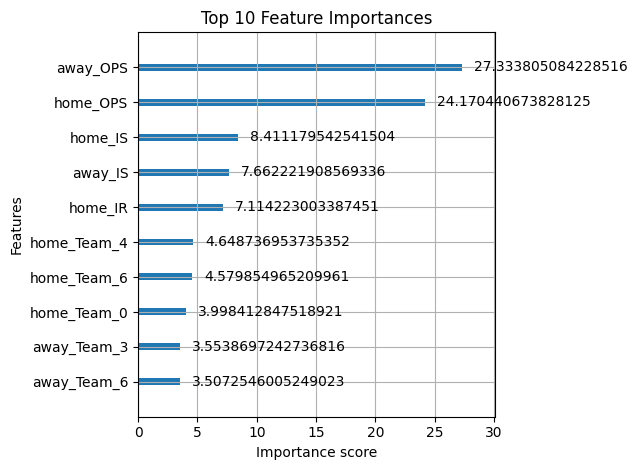

In [26]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# ÏÉÅÏúÑ 10Í∞ú Ï§ëÏöî Î≥ÄÏàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plot_importance(best_model, max_num_features=10, importance_type='gain')  # 'weight', 'gain', 'cover' ÏÑ†ÌÉù Í∞ÄÎä•
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\cjlee\anaconda3\envs\pandas\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17116\2113702705.py:11: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17116\2113702705.py:11: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17116\2113702705.py:11: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17116\2113702705.py:1

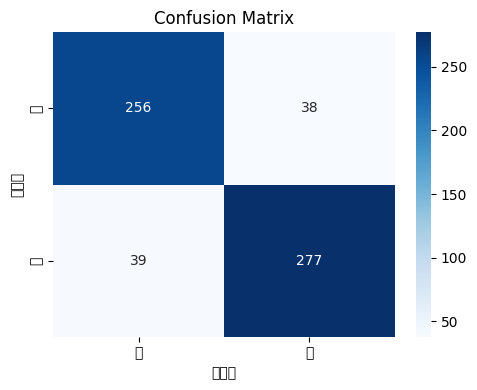

In [27]:
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ìå®', 'Ïäπ'], yticklabels=['Ìå®', 'Ïäπ'])
plt.xlabel('ÏòàÏ∏°Í∞í')
plt.ylabel('Ïã§Ï†úÍ∞í')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


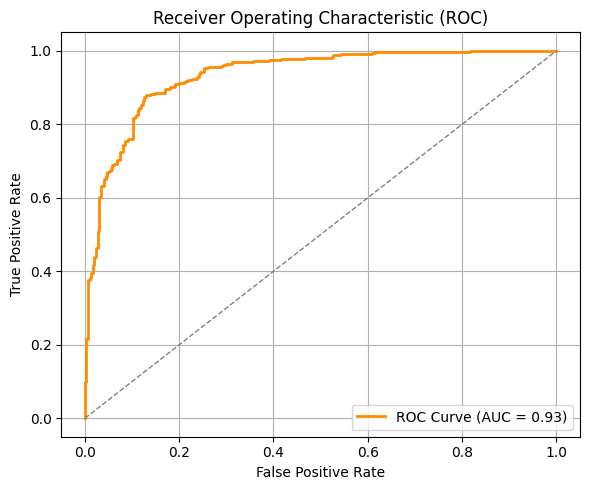

In [28]:
from sklearn.metrics import roc_curve, auc

y_score = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


‚úÖ Ï†ÑÏ≤¥Ï†ÅÏù∏ Î™®Îç∏ ÌèâÍ∞Ä


üéØ 1. Ï†ïÌôïÎèÑ(Accuracy)

Train Accuracy: 0.979 ‚Üí Í±∞Ïùò ÏôÑÎ≤ΩÌïòÍ≤å ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ•ò

Test Accuracy: 0.875 ‚Üí Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎèÑ Îß§Ïö∞ ÎÜíÏùÄ ÏòàÏ∏° ÏÑ±Îä•

‚ñ∂Ô∏è Ï†ïÌôïÎèÑ Ï∞®Ïù¥(10%‚Üì)Îäî Í≥ºÏ†ÅÌï©ÏùÑ ÏãúÏÇ¨ÌïòÏßÄÎßå Ïó¨Ï†ÑÌûà ÌÖåÏä§Ìä∏ ÏÑ±Îä•ÏùÄ Îß§Ïö∞ Îõ∞Ïñ¥ÎÇ®


üéØ 2. AUC (Area Under Curve)

Train AUC: 0.998

Test AUC: 0.947

‚ñ∂Ô∏è 0.94 Ïù¥ÏÉÅÏùÄ Îß§Ïö∞ Ï¢ãÏùÄ ÏàòÏ§Ä.

Ï¶â, Î™®Îç∏Ïù¥ ÌôàÌåÄ Ïäπ/Ìå®Î•º Í∞ïÌïòÍ≤å Íµ¨Î∂ÑÌï† Ïàò ÏûàÎäî Îä•Î†•ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏùå.


üéØ 3. Precision, Recall, F1-Score

ÌÅ¥ÎûòÏä§	precision	recall	f1-score

ÌôàÌåÄ Ìå® (0)	0.88	0.86	0.87

ÌôàÌåÄ Ïäπ (1)	0.88	0.89	0.88

Ï†ïÌôïÎèÑÏôÄ Í∑†ÌòïÏù¥ Ïûò Ïû°Ìûå precision/recall: Î™®Îç∏Ïù¥ Ìïú Ï™ΩÏúºÎ°ú ÏπòÏö∞ÏπòÏßÄ ÏïäÏùå

ÌÅ¥ÎûòÏä§ Í∞Ñ ÏÑ±Îä• Í∑†ÌòïÏù¥ Ï¢ãÏùå: ÌôàÌåÄ Ïäπ/Ìå® Î™®Îëê Ïûò ÏòàÏ∏°ÌïòÍ≥† ÏûàÏùå


üéØ 4. Confusion Matrix Î∂ÑÏÑù

[[254  40]  ‚Üí Ïã§Ï†ú 0Ïù∏Îç∞ 1Î°ú ÏûòÎ™ª ÏòàÏ∏°: 40Í±¥

 [ 36 280]] ‚Üí Ïã§Ï†ú 1Ïù∏Îç∞ 0ÏúºÎ°ú ÏûòÎ™ª ÏòàÏ∏°: 36Í±¥

Ïò§Î•ò ÎπÑÏú®Ïù¥ ÎåÄÏπ≠Ï†ÅÏù¥Í≥†, Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏòàÏ∏° Ï†ïÌôïÎèÑÍ∞Ä Îß§Ïö∞ ÏïàÏ†ïÏ†ÅÏûÑÏùÑ Î≥¥Ïó¨Ï§å


‚öñÔ∏è ÏµúÏ¢Ö ÌèâÍ∞Ä

Ìï≠Î™©	ÌèâÍ∞Ä ÎÇ¥Ïö©

üéØ ÏòàÏ∏° Ï†ïÌôïÎèÑ	‚≠ê Îß§Ïö∞ ÎÜíÏùå (87% Ïù¥ÏÉÅ)

üéØ ÏùºÎ∞òÌôî(AUC) ÏÑ±Îä•	‚≠ê Îß§Ïö∞ ÎÜíÏùå (0.94+)

üß† Í≥ºÏ†ÅÌï© ÏúÑÌóò	‚ö†Ô∏è ÏùºÎ∂Ä Ï°¥Ïû¨ÌïòÏßÄÎßå Ïã§Ï†ú ÏÑ±Îä• Ï†ÄÌïò Ï†ÅÏùå

‚öñÔ∏è ÌÅ¥ÎûòÏä§ Í∑†Ìòï	‚≠ê Ïûò ÎßûÏùå (precision/recall Í∑†Ìòï)

üß™ Ïã§Ï†Ñ Ï†ÅÏö© Í∞ÄÎä•ÏÑ±	‚úÖ Ïã†Î¢∞ÎèÑ ÎÜíÏùÄ ÏòàÏ∏° Í∞ÄÎä•, ÏùëÏö© Í∞ÄÎä•

‚úÖ 1. Í≥ºÏ†ÅÌï© ÏôÑÌôî (Overfitting ÏôÑÌôî)

üéØ Î™©Ï†Å:

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎÑàÎ¨¥ Îî± ÎßûÏ∂∞ÏßÑ Î™®Îç∏ÏùÑ ÏùºÎ∞òÌôîÏãúÏºú ÌÖåÏä§Ìä∏/Ïã§Ï†ÑÏóêÏÑúÎèÑ ÏïàÏ†ïÏ†ÅÏù¥Í≤å ÌïòÍ∏∞

üîß Î∞©Î≤ï:

Í∏∞Î≤ï	ÏÑ§Î™Ö

max_depth Í∞êÏÜå	Ìä∏Î¶¨ ÍπäÏù¥Î•º Ï§ÑÏù¥Î©¥ Î™®Îç∏ Î≥µÏû°ÎèÑÍ∞Ä Ï§ÑÍ≥†, Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

subsample < 1.0	ÌïôÏäµ ÏÉòÌîåÏùò ÏùºÎ∂ÄÎßå ÏÇ¨Ïö©Ìï¥ÏÑú ÏùºÎ∞òÌôî ÏÑ±Îä• Ìñ•ÏÉÅ

colsample_bytree < 1.0	ÏùºÎ∂Ä featureÎßå ÏÇ¨Ïö©

early_stopping_rounds ÏÇ¨Ïö©	Í≤ÄÏ¶ù ÏÑ±Îä•Ïù¥ Í∞úÏÑ†ÎêòÏßÄ ÏïäÏúºÎ©¥ ÌïôÏäµ Ï§ëÎã®

In [29]:
import joblib

# ÏµúÏ†Å Î™®Îç∏ Ï†ÄÏû•
joblib.dump(best_model, 'xgb_best_model.pkl')
print("‚úÖ Î™®Îç∏Ïù¥ 'xgb_best_model.pkl'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

‚úÖ Î™®Îç∏Ïù¥ 'xgb_best_model.pkl'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
